# Setup

In [1]:
# Set working dir to project root
from pathlib import Path
import os

In [2]:
cwd = Path().resolve().parent
os.chdir(cwd)
cwd

PosixPath('/home/victorvu-tran-01/Documents/code/i-soft/icam-factory')

# Train and Evaluate

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

## Train

In [3]:
DATASET_FILE = "datasets/Hard Hat Workers.v5-raw_headhelmetclasses.yolov11/data.yaml"

In [4]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("pretrained/yolo11n.pt")
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [5]:
# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data=DATASET_FILE, epochs=100, imgsz=640)
results

Ultralytics 8.3.235 🚀 Python-3.13.10 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 15840MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/Hard Hat Workers.v5-raw_headhelmetclasses.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=pretrained/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=aut

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7500d409a970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Run inference

In [3]:
MODEL_FILE = "runs/detect/train5/weights/best.pt"

In [4]:
model = YOLO(MODEL_FILE)

In [5]:
def predict_and_save(source_file: str, dest_file: str | None = None):
    results = model(source=source_file)
    annotated_frame = results[0].plot()
    if dest_file is not None:
        cv2.imwrite(dest_file, annotated_frame)
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))


image 1/1 /home/victorvu-tran-01/Documents/code/i-soft/icam-factory/crowd-shows.jpg: 480x640 18 heads, 3 helmets, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)


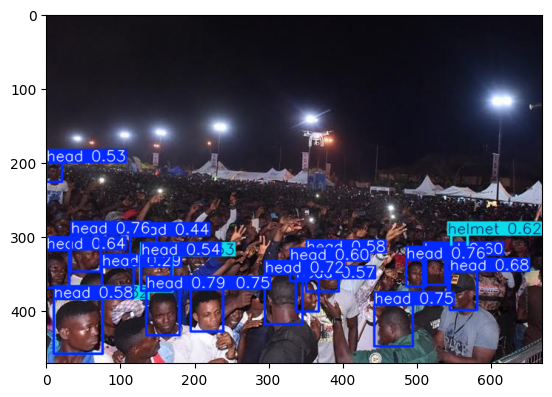

In [6]:
predict_and_save(
    source_file="https://hei.org.ng/wp-content/uploads/2019/12/crowd-shows.jpg",
    dest_file="runs/detect/predict/crowd-shows.png"
)


image 1/1 /home/victorvu-tran-01/Documents/code/i-soft/icam-factory/Cover-16.webp: 448x640 8 helmets, 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


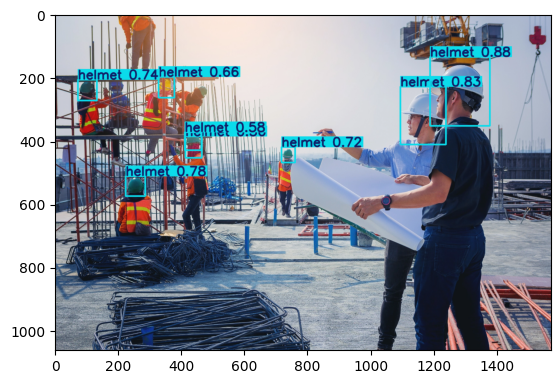

In [7]:
predict_and_save(
    source_file="https://detecttechnologies.com/wp-content/uploads/2025/06/Cover-16.webp"
)


image 1/1 /home/victorvu-tran-01/Documents/code/i-soft/icam-factory/types-of-construction-workers​-975x548.webp: 384x640 7 helmets, 16.4ms
Speed: 6.4ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


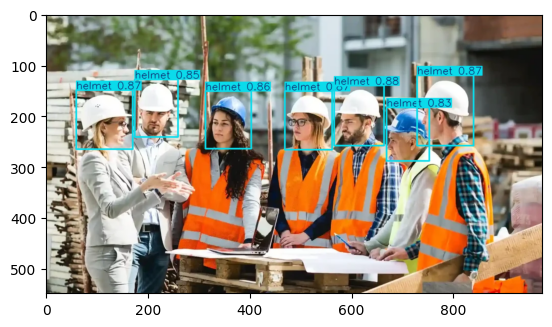

In [ ]:
predict_and_save(
    source_file="https://www.infra.ratepersqft.com/wp-content/uploads/2025/01/types-of-construction-workers%E2%80%8B-975x548.webp",
)